In [15]:
import qforte
import numpy
import scipy
from scipy.optimize import minimize

# want to make a gate acting on a single qubit that is simply a rotation 


In [16]:
def prep_circuit_maker(param):
    temp_gate = qforte.make_gate("Rx", 0, 0, param)
    #temp_circ = qforte.QuantumCircuit()
    #temp_circ.add_gate(temp_gate)
    return temp_gate

def exp_avg(measurements):
    nume = sum(measurements)
    denom = len(measurements)
    return nume/denom
        

In [18]:
wfn = qforte.QuantumComputer(1)

#make a state preparation circuit
p1 = prep_circuit_maker(1.71)
print(p1.str())

#apply the state preperatio circuit to build the state
wfn.apply_gate(p1)

wfn.str()

Rx gate, target qubit:0, contol qubit:0
  +0.656219 +0.000000 i  -0.000000 -0.754571 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i
  -0.000000 -0.754571 i  +0.656219 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i
  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i
  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i



['(0.656219 +0.000000 i) |0>', '(0.000000 -0.754571 i) |1>']

In [19]:
#make hamiltonian 
H = qforte.QuantumCircuit()
z0 = qforte.make_gate('Z',0,0)
H.add_gate(z0)
H.str()

['Z gate, target qubit:0, contol qubit:0\n  +1.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i\n  +0.000000 +0.000000 i  -1.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i\n  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i\n  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i  +0.000000 +0.000000 i\n']

In [22]:
angle_range = numpy.linspace(0.0, 2 * numpy.pi, 20)
exp_vals = [None]*len(angle_range)

for k in range (len(angle_range)):
    wfn1 = qforte.QuantumComputer(1)
    #print(wfn1.str())
    Rot = prep_circuit_maker(angle_range[k])
    wfn1.apply_gate(Rot)
    measurements = wfn1.measure_circuit(H,1000)
    exp_vals[k] = exp_avg(measurements)
    



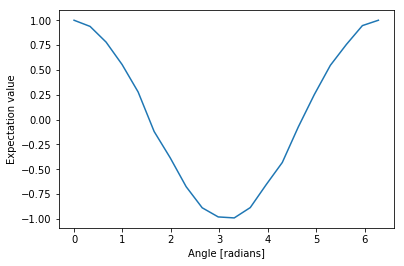

In [23]:
import matplotlib.pyplot as plt
plt.xlabel('Angle [radians]')
plt.ylabel('Expectation value')
plt.plot(angle_range, exp_vals)
plt.show()

In [27]:
def Energy(Theta): 
    wfn1 = qforte.QuantumComputer(1)
    #print(wfn1.str())
    Rot = prep_circuit_maker(Theta)
    wfn1.apply_gate(Rot)
    measurements = wfn1.measure_circuit(H,1000000)
    return exp_avg(measurements)
    

In [28]:
res = minimize(Energy, [0.1], method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 36
         Function evaluations: 86


In [29]:
print(res)

 final_simplex: (array([[3.1425    ],
       [3.14249999]]), array([-1., -1.]))
           fun: -1.0
       message: 'Optimization terminated successfully.'
          nfev: 86
           nit: 36
        status: 0
       success: True
             x: array([3.1425])
